In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# 데이터 sheet별로 뽑아서 받기
apart_df1 = pd.read_excel('data/2019.xls',sheet_name='1.주택현황및보급률')
apart_df2 = pd.read_excel('data/2019.xls',sheet_name='5. 건축허가(3-3)')
apart_df3 = pd.read_excel('data/2019.xls',sheet_name='6.아파트건립')
apart_df4 = pd.read_excel('data/2019.xls',sheet_name='7.주택가격지수')
apart_df5 = pd.read_excel('data/2019.xls',sheet_name='8.지가변동률')
apart_df6 = pd.read_excel('data/2019.xls',sheet_name='9.토지거래현황(2-1)(2-2)')

In [3]:
data1 =apart_df1['Type of Housing Units and Hosing supply rate']
data1 = data1.drop([0,1,2,3]).dropna() # 주택현황 보급률-아파트
data2=apart_df2['Unnamed: 3']
data2= data2.drop([1,2,3,4]).dropna() # 건축허가(3-3)의 주거용 동수
data3=apart_df2['Unnamed: 4']
data3 = data3.drop([3,4]).dropna() # 건축허가(3-3)의 주거용 연면적
data4 = apart_df3['Unnamed: 1']
data4= data4.drop([1,3,4]).dropna() # 아파트건립[동수]
data5 = apart_df3['Unnamed: 2']
data5= data5.drop([1,3,4]).dropna() # 아파트건립[주택수]
data6 = apart_df5['Unnamed: 1']
data6 = data6.drop(1).dropna() # 지가변동률의 평균
data7 = apart_df6['Unnamed: 3']
data7 = data7.drop([1,2,3,4,5,6]).dropna() # 토지거래현황의 주거지역의 필지수
data8 = apart_df6['Unnamed: 4']
data8 = data8.drop([1,2,3,4,5,6]).dropna() # 토지거래현황의 주거지역의 면적
data9 = apart_df4['Unnamed: 4']
data9= data9.drop(2).dropna() # 아파트 전세 가격 지수
data10 = apart_df4['Unnamed: 2']
data10= data10.drop(2).dropna() # 아파트 매매 가격 지수

In [4]:
data1 = data1.to_frame(name='아파트 보급률').reset_index().drop(['index'],axis=1)
data2 = data2.to_frame(name='건축허가-주거용[동수]').reset_index().drop(['index'],axis=1)
data3 = data3.to_frame(name='건축허가-주거용[연면적]').reset_index().drop(['index'],axis=1)
data4 = data4.to_frame(name='아파트건립[동수]').reset_index().drop(['index'],axis=1)
data5 = data5.to_frame(name='아파트건립[주택수]').reset_index().drop(['index'],axis=1)
data6 = data6.to_frame(name='지가변동률[평균]').reset_index().drop(['index'],axis=1)
data7 = data7.to_frame(name='토지거래[필지수]').reset_index().drop(['index'],axis=1)
data8 = data8.to_frame(name='토지거래[면적]').reset_index().drop(['index'],axis=1)
data9 = data9.to_frame(name='전세가격지수').reset_index().drop(['index'],axis=1)
data10 = data10.to_frame(name='매매가격지수').reset_index().drop(['index'],axis=1)

In [5]:
apt_df = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10],axis=1)
apt_df.to_csv('apt.csv',encoding='cp949')

In [6]:
apt_df

,아파트 보급률,건축허가-주거용[동수],건축허가-주거용[연면적],아파트건립[동수],아파트건립[주택수],지가변동률[평균],토지거래[필지수],토지거래[면적],전세가격지수,매매가격지수
0,82720,120,98298,15,1042,1.188,10661,1484,108.5,100
1,84136,284,1153400,21,1416,1.437,13542,2849,113.9,101.8
2,84136,342,1502363,29,3481,1.321,16863,2965,104.079186,103.057796
3,88261,378,1461651,47,4125,2.325,22092,3341,107.2,103.5
4,94890,485,1049205,91,10941,3.345,19979,5649,99.8,100.1
5,118095,221,192797,78,9476,3.464,18303,1809,93.5,98.6
6,121854,288,831876,98,10438,3.974,22460,2212,91.3,96.1


In [7]:
print('아파트 관련 데이터 프레임 크기 : ', apt_df.shape)

아파트 관련 데이터 프레임 크기 :  (7, 10)


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()
val = apt_df.values
SD_scaler = scaler1.fit_transform(val)
MM_scaler= scaler2.fit_transform(val)
RB_scaler = scaler3.fit_transform(val)
SD_scaled_apart_df=pd.DataFrame(SD_scaler,columns=apt_df.columns)
MM_scaled_apart_df=pd.DataFrame(MM_scaler,columns=apt_df.columns)
RB_scaled_apart_df=pd.DataFrame(RB_scaler,columns=apt_df.columns)

In [9]:
SD_scaled_apart_df

,아파트 보급률,건축허가-주거용[동수],건축허가-주거용[연면적],아파트건립[동수],아파트건립[주택수],지가변동률[평균],토지거래[필지수],토지거래[면적],전세가격지수,매매가격지수
0,-0.877823,-1.696516,-1.531027,-1.223483,-1.203686,-1.163342,-1.736330,-1.109279,0.774955,-0.187325
1,-0.786284,-0.172572,0.487668,-1.035941,-1.109969,-0.931286,-1.025665,-0.040923,1.485598,0.560125
2,-0.786284,0.366384,1.155328,-0.785887,-0.592518,-1.039392,-0.206465,0.049868,0.193173,1.082425
3,-0.519618,0.700908,1.077435,-0.223263,-0.431143,-0.103713,1.083387,0.344155,0.603874,1.266050
4,-0.091077,1.695188,0.288315,1.152038,1.276820,0.846878,0.562167,2.150577,-0.369970,-0.145800
5,1.409040,-0.757989,-1.350225,0.745699,0.909718,0.957780,0.148744,-0.854908,-1.199054,-0.768675
6,1.652045,-0.135403,-0.127494,1.370836,1.150778,1.433075,1.174162,-0.539489,-1.488575,-1.806800


In [10]:
MM_scaled_apart_df

,아파트 보급률,건축허가-주거용[동수],건축허가-주거용[연면적],아파트건립[동수],아파트건립[주택수],지가변동률[평균],토지거래[필지수],토지거래[면적],전세가격지수,매매가격지수
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761062,0.527027
1,0.036183,0.449315,0.751462,0.072289,0.037782,0.089375,0.244173,0.327731,1.000000,0.770270
2,0.036183,0.608219,1.000000,0.168675,0.246389,0.047739,0.525638,0.355582,0.565451,0.940243
3,0.141590,0.706849,0.971004,0.385542,0.311446,0.408112,0.968811,0.445858,0.703540,1.000000
4,0.310983,1.000000,0.677253,0.915663,1.000000,0.774228,0.789728,1.000000,0.376106,0.540541
5,0.903945,0.276712,0.067304,0.759036,0.852005,0.816942,0.647682,0.078031,0.097345,0.337838
6,1.000000,0.460274,0.522467,1.000000,0.949187,1.000000,1.000000,0.174790,0.000000,0.000000


In [11]:
RB_scaled_apart_df

,아파트 보급률,건축허가-주거용[동수],건축허가-주거용[연면적],아파트건립[동수],아파트건립[주택수],지가변동률[평균],토지거래[필지수],토지거래[면적],전세가격지수,매매가격지수
0,-0.247847,-1.562791,-1.195825,-0.537815,-0.410601,-0.561343,-1.310132,-1.194748,0.394716,-0.031960
1,-0.184510,-0.037209,0.131032,-0.436975,-0.360791,-0.438410,-0.816218,0.000000,0.876858,0.543322
2,-0.184510,0.502326,0.569875,-0.302521,-0.085769,-0.495680,-0.246871,0.101532,0.000000,0.945316
3,0.000000,0.837209,0.518677,0.000000,0.000000,0.000000,0.649580,0.430635,0.278644,1.086645
4,0.296513,1.832558,0.000000,0.739496,0.907771,0.503579,0.287331,2.450766,-0.382070,0.000000
5,1.334466,-0.623256,-1.076987,0.521008,0.712659,0.562330,0.000000,-0.910284,-0.944570,-0.479402
6,1.502606,0.000000,-0.273305,0.857143,0.840780,0.814120,0.712669,-0.557549,-1.140999,-1.278405


In [12]:
Y = apt_df['매매가격지수']
X = apt_df.drop(['매매가격지수'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('스케일전 데이터\n')
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

스케일전 데이터

MSE : 8.252, RMSE : 2.873
R^2(Variance score) : -0.943


In [13]:
Y = SD_scaled_apart_df['매매가격지수']
X = SD_scaled_apart_df.drop(['매매가격지수'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('StandardScaler 데이터\n')
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

StandardScaler 데이터

MSE : 0.775, RMSE : 0.880
R^2(Variance score) : -0.058


In [14]:
Y = MM_scaled_apart_df['매매가격지수']
X = MM_scaled_apart_df.drop(['매매가격지수'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MinMaxScaler 데이터\n')
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MinMaxScaler 데이터

MSE : 0.109, RMSE : 0.330
R^2(Variance score) : -0.405


In [15]:
Y = RB_scaled_apart_df['매매가격지수']
X = RB_scaled_apart_df.drop(['매매가격지수'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('RobustScaler 데이터\n')
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

RobustScaler 데이터

MSE : 0.497, RMSE : 0.705
R^2(Variance score) : -0.146


In [16]:
Y = apt_df['매매가격지수']
X = []
Index = apt_df.columns
Index = Index.drop(['매매가격지수'])
for i in range(len(Index)):
    for j in range(len(Index)):
        if i<=j:
            continue        
        X.append(apt_df[[Index[i],Index[j]]])

lr = LinearRegression()
final_r2 = 0
final_index=0
for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.3, random_state=156)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    temp_r2 = r2_score(Y_test, Y_predict)
    if final_r2 <= temp_r2:
        final_r2 = temp_r2
        final_index = i
print('스케일 전 데이터\n')
print('2개 변수를 이용한 X의 개수 : %d'%len(X))
print('좋은 R^2를 보인 2개의 변수 : %s, %s'%(X[final_index].columns[0], X[final_index].columns[1]))
print('R^2 = {0:.3f}'.format(final_r2))
X_train, X_test, Y_train, Y_test = train_test_split(X[final_index], Y, test_size=0.3, random_state=156)
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

스케일 전 데이터

2개 변수를 이용한 X의 개수 : 36
좋은 R^2를 보인 2개의 변수 : 전세가격지수, 건축허가-주거용[동수]
R^2 = 0.515


In [17]:
Y = SD_scaled_apart_df['매매가격지수']
X = []
Index = SD_scaled_apart_df.columns
Index = Index.drop(['매매가격지수'])
for i in range(len(Index)):
    for j in range(len(Index)):
        if i<=j:
            continue        
        X.append(SD_scaled_apart_df[[Index[i],Index[j]]])

lr = LinearRegression()
final_r2 = 0
final_index=0
for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.3, random_state=156)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    temp_r2 = r2_score(Y_test, Y_predict)
    if final_r2 <= temp_r2:
        final_r2 = temp_r2
        final_index = i
print('standard 스케일 후 데이터\n')
print('2개 변수를 이용한 X의 개수 : %d'%len(X))
print('좋은 R^2를 보인 스케일된 변수 : %s, %s'%(X[final_index].columns[0], X[final_index].columns[1]))
print('R^2 = {0:.3f}'.format(final_r2))
X_train, X_test, Y_train, Y_test = train_test_split(X[final_index], Y, test_size=0.3, random_state=156)
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

standard 스케일 후 데이터

2개 변수를 이용한 X의 개수 : 36
좋은 R^2를 보인 스케일된 변수 : 전세가격지수, 건축허가-주거용[동수]
R^2 = 0.515


In [18]:
Y = MM_scaled_apart_df['매매가격지수']
X = []
Index = MM_scaled_apart_df.columns
Index = Index.drop(['매매가격지수'])
for i in range(len(Index)):
    for j in range(len(Index)):
        if i<=j:
            continue        
        X.append(MM_scaled_apart_df[[Index[i],Index[j]]])

lr = LinearRegression()
final_r2 = 0
final_index=0
for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.3, random_state=156)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    temp_r2 = r2_score(Y_test, Y_predict)
    if final_r2 <= temp_r2:
        final_r2 = temp_r2
        final_index = i
print('Min Max 스케일 데이터\n')
print('2개 변수를 이용한 X의 개수 : %d'%len(X))
print('좋은 R^2를 보인 스케일된 변수 : %s, %s'%(X[final_index].columns[0], X[final_index].columns[1]))
print('R^2 = {0:.3f}'.format(final_r2))
X_train, X_test, Y_train, Y_test = train_test_split(X[final_index], Y, test_size=0.3, random_state=156)
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

Min Max 스케일 데이터

2개 변수를 이용한 X의 개수 : 36
좋은 R^2를 보인 스케일된 변수 : 전세가격지수, 건축허가-주거용[동수]
R^2 = 0.515


In [19]:
Y = RB_scaled_apart_df['매매가격지수']
X = []
Index = RB_scaled_apart_df.columns
Index = Index.drop(['매매가격지수'])
for i in range(len(Index)):
    for j in range(len(Index)):
        if i<=j:
            continue        
        X.append(RB_scaled_apart_df[[Index[i],Index[j]]])

lr = LinearRegression()
final_r2 = 0
final_index=0
for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.3, random_state=156)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    temp_r2 = r2_score(Y_test, Y_predict)
    if final_r2 <= temp_r2:
        final_r2 = temp_r2
        final_index = i
print('Robust 스케일 데이터\n')
print('2개 변수를 이용한 X의 개수 : %d'%len(X))
print('좋은 R^2를 보인 스케일된 변수 : %s, %s'%(X[final_index].columns[0], X[final_index].columns[1]))
print('R^2 = {0:.3f}'.format(final_r2))
X_train, X_test, Y_train, Y_test = train_test_split(X[final_index], Y, test_size=0.3, random_state=156)
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

Robust 스케일 데이터

2개 변수를 이용한 X의 개수 : 36
좋은 R^2를 보인 스케일된 변수 : 전세가격지수, 건축허가-주거용[동수]
R^2 = 0.515


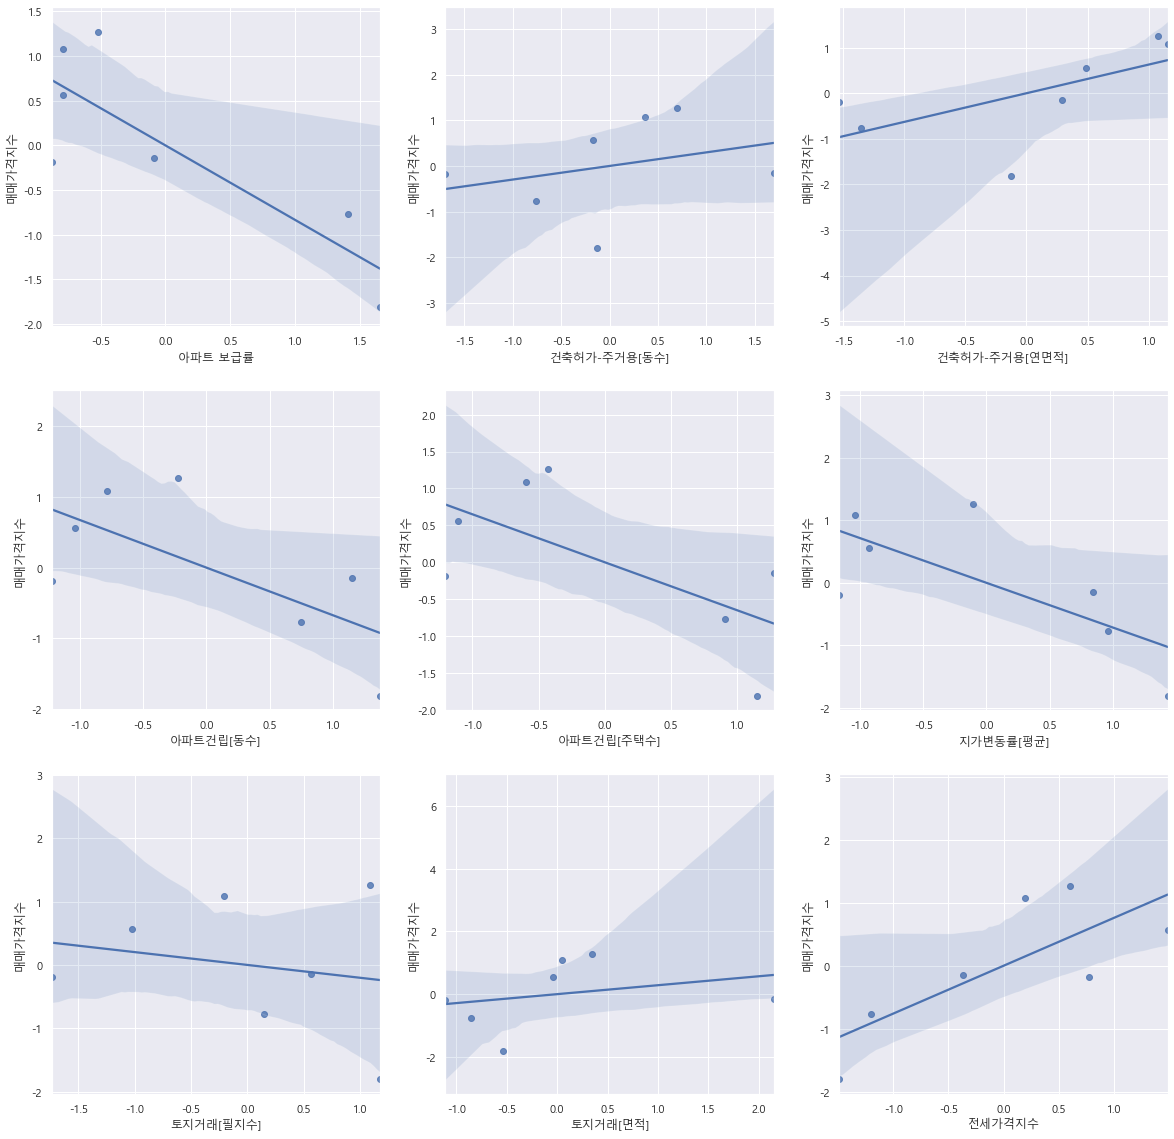

In [20]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
fig, axs = plt.subplots(figsize=(20, 20), ncols=3, nrows=3)
x_features = SD_scaled_apart_df.columns[:len(apt_df.columns)-1]
x_features
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='매매가격지수', data=SD_scaled_apart_df, ax=axs[row][col])

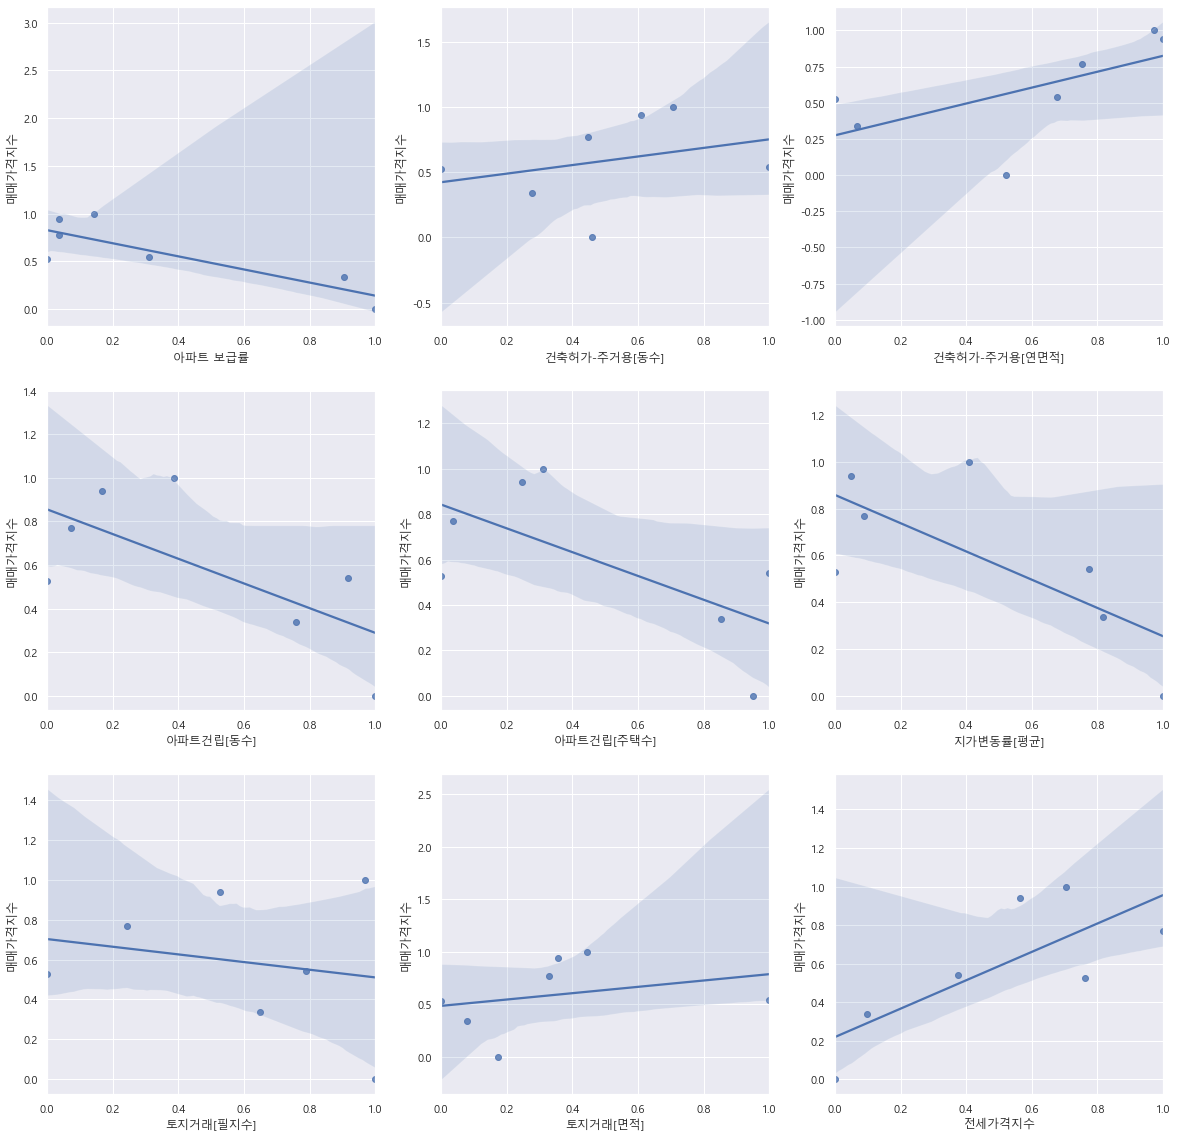

In [21]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
fig, axs = plt.subplots(figsize=(20, 20), ncols=3, nrows=3)
x_features = MM_scaled_apart_df.columns[:len(apt_df.columns)-1]
x_features
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='매매가격지수', data=MM_scaled_apart_df, ax=axs[row][col])

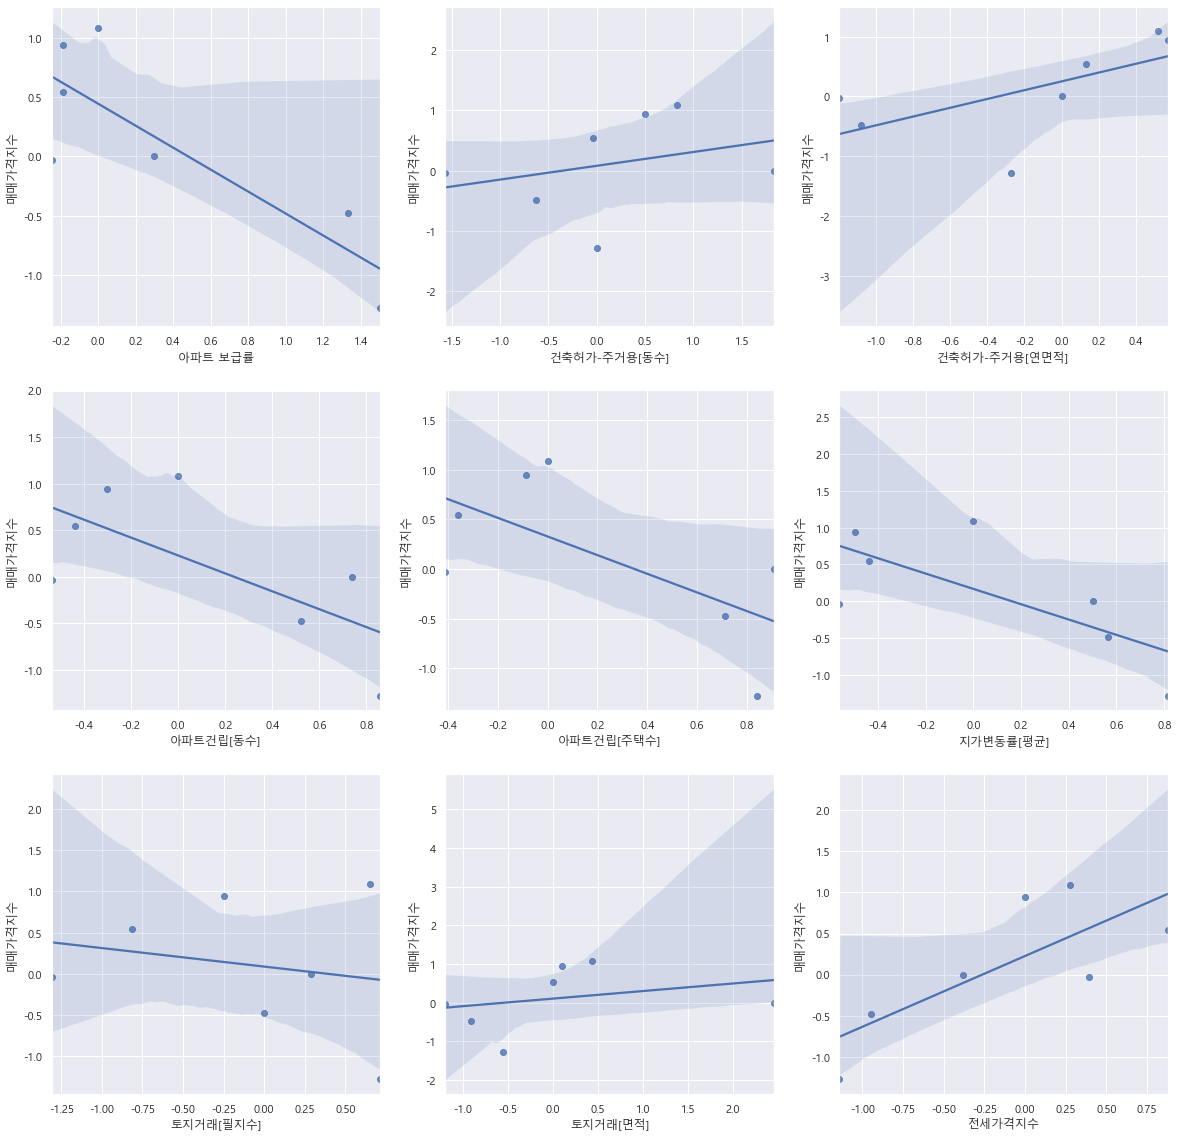

In [22]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
fig, axs = plt.subplots(figsize=(20, 20), ncols=3, nrows=3)
x_features = RB_scaled_apart_df.columns[:len(apt_df.columns)-1]
x_features
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='매매가격지수', data=RB_scaled_apart_df, ax=axs[row][col])